In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm, multivariate_normal
from sklearn.cluster import AgglomerativeClustering as AC
from scipy.cluster.hierarchy import dendrogram

In [3]:
def plot_dendrogram(model, **kwargs):
    '''Grafica el dendograma'''

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Creamos datos artificiales. Tres gaussianas multivariadas para representar tres clusters distintos.

In [4]:
# Creamos los objetos dada una media (mean) y una covarianza (cov)
N1 = multivariate_normal(mean=[1.5,1.5], cov=0.05)
N2 = multivariate_normal(mean=[0,0], cov=0.2)
N3 = multivariate_normal(mean=[1.5,0], cov=0.05)

# Muestreamos 30 puntos de cada gaussiana
n = 30
d1 = N1.rvs(size=n)
d2 = N2.rvs(size=n)
d3 = N3.rvs(size=n)


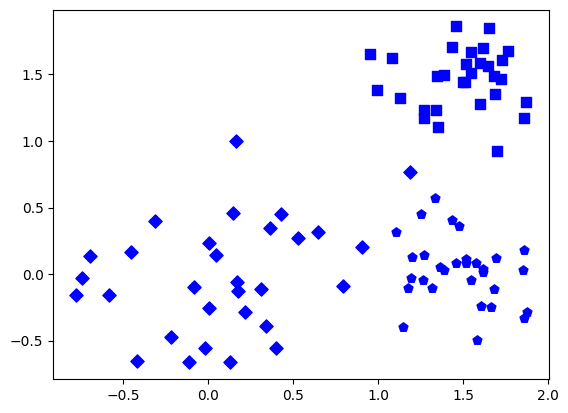

In [5]:
# Graficamos  
plt.scatter(d1[:,0], d1[:,1],s=45, marker='s', c='blue')
plt.scatter(d2[:,0], d2[:,1],s=45, marker='D', c='blue')
plt.scatter(d3[:,0], d3[:,1],s=45, marker='p', c='blue')
# plt.box(False)
# plt.axis('off')
plt.show()

Agrupamos los datos para realizar el clústering. Creamos una etiqueta para cada gaussiana.

In [6]:
data = np.vstack([d1,d2,d3])
label = np.hstack([0*np.ones(d1.shape[0]),1*np.ones(d2.shape[0]),2*np.ones(d3.shape[0])])

Definimos el objeto de clustering jerárquico. 
* _n_clusters_ define la cantidad de clusters a encontrar
* _affinity_ define la métrica*
* _linkage_ define la forma de agrupar.

In [7]:
ac = AC(n_clusters=None,
        affinity='euclidean',
        linkage = 'complete',
        distance_threshold=0.0)

In [8]:
# Ajustamos a los datos
ac.fit(data)

AgglomerativeClustering(distance_threshold=0.0, linkage='complete',
                        n_clusters=None)

Ahora graficamos el dendograma.

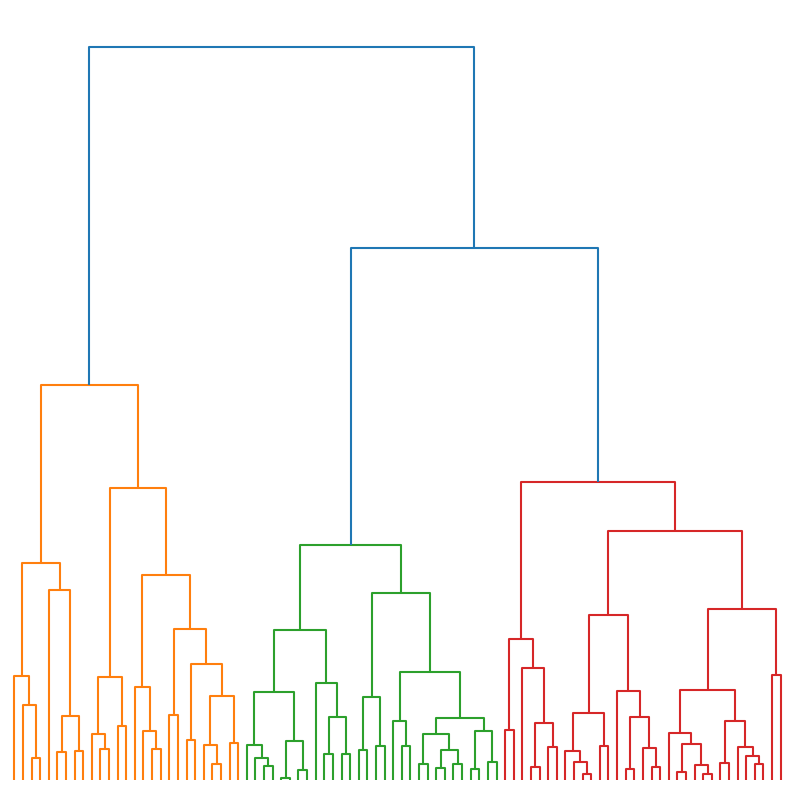

In [9]:
plt.figure(figsize=(10,10))
plt.box(False)
plt.axis('off')
plot_dendrogram(ac,**{'labels':label})

Podemos diferenciar tres estructuras que corresponden a cada cluster creado anteriormente.

Para detectar un _outlier_, se sigue el mismo procedimiento. Creamos un punto alejado y realizamos el clustering.

In [9]:
# Creamos un punto alejado
outlier = np.array([[4,2.5]])
label_outlier = np.array([3])

# Agregamos el punto al resto de los datos
data = np.vstack([data, outlier])
label = np.hstack([label, label_outlier])

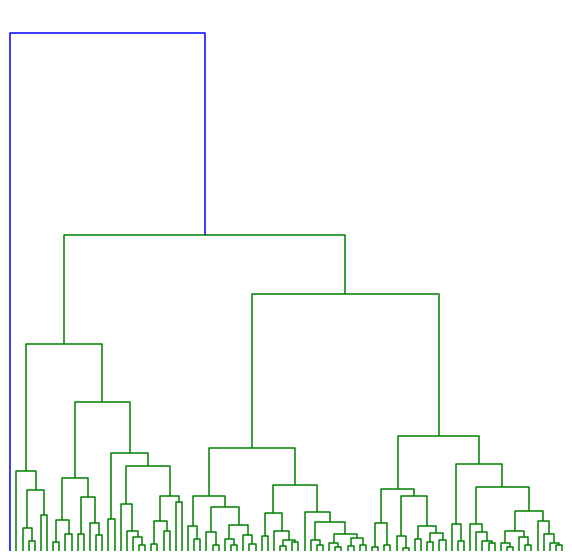

In [10]:
ac = AC(n_clusters=None,
        affinity='euclidean',
        linkage = 'complete',
        distance_threshold=0.0)
# Ajustamos a los datos
ac.fit(data)
# Graficamos
plt.figure(figsize=(10,10))
plt.box(False)
plt.axis('off')
plot_dendrogram(ac,)

Podemos ver que hay un punto alejado del resto de los clusters, asociado al punto que creamos.